## MNIST 使用
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


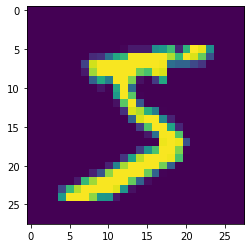

In [2]:
plt.figure()
plt.imshow(x_train[0])

plt.show()

In [2]:
x_train = x_train.reshape([x_train.shape[0], 28*28])
x_test = x_test.reshape([x_test.shape[0], 28*28])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


# 建立DNN網路模型 
TensorFlow產生DNN的寫法

In [9]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()

        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):

        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

# 繼承class
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

batch_size = 5

# 雖然是隨機取5筆，沒有辦法run完所有train data達成1 epoch，但是只要是均勻取出，隨機也ok
data_loader = MNISTLoader()
model = MLP()

X, y = data_loader.get_batch(batch_size)
with tf.GradientTape() as tape:
    y_pred = model(X)
    print(y_pred)
    print(y_pred.shape)
    
print(model.dense1.weights[0])
print(model.dense1.weights[1])

tf.Tensor(
[[0.09365687 0.15485688 0.12811404 0.02967936 0.04417886 0.03111425
  0.0498021  0.12320989 0.2763345  0.06905318]
 [0.15970448 0.10490821 0.15708432 0.03440432 0.05480285 0.0501827
  0.0319369  0.10031814 0.2531158  0.05354224]
 [0.08560909 0.16857977 0.10968477 0.09042832 0.04178071 0.05999758
  0.08710173 0.12890552 0.16259614 0.06531633]
 [0.14848343 0.20813157 0.10417087 0.0705237  0.04526785 0.05870502
  0.04280221 0.09970608 0.1377503  0.08445895]
 [0.13356504 0.13049458 0.10276928 0.03913295 0.04549072 0.05084281
  0.06201583 0.09144097 0.2625242  0.08172364]], shape=(5, 10), dtype=float32)
(5, 10)
<tf.Variable 'mlp/dense_3/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.02024906,  0.00670443,  0.0556594 , ...,  0.03752351,
         0.05802417,  0.02390353],
       [-0.00723954, -0.05080343, -0.00284882, ...,  0.01261727,
        -0.03333433, -0.00287825],
       [-0.082204  ,  0.03700937,  0.06952223, ..., -0.01945987,
         0.06758511,  0.01690879],
